In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import warnings
# warnings.filterwarnings('ignore')
# 학습용 데이터와 테스트용 데이터 분할
data = pd.read_csv('MacroQ.csv', encoding='utf-8')

train = data[data['회계연도'] < '2019-01-01']
test = data[data['회계연도'] >= '2019-01-01']


In [3]:
train.tail()

,Column1,회계연도,Kospi,usdkrw,jpykrw,k3yr,k10yr,kospi_per,kospi_pbr,vkospi200,...,usa_pmi,china_pmi,kr_export(%),kr_cpi_yoy(%),uscpi_yoy(%),treasury_10_3_diff(%),us_10_2_diff(%),us_e_infla(%),kr_real_rate(%),lables
43,43,2017-12-01,2467.4900,1083.375000,9.563238,2.096576,2.470119,12.99,1.11,12.416842,...,59.3,51.5,8.9,1.4,2.2,0.373543,0.558500,2.82407,0.696576,3
44,44,2018-03-01,2445.8501,1069.602273,10.061364,2.271191,2.711936,13.10,1.12,16.986190,...,59.3,51.0,5.5,1.2,2.2,0.440745,0.823810,1.68874,1.071191,3
45,45,2018-06-01,2326.1299,1094.261905,9.916476,2.178762,2.662829,11.05,1.05,14.464737,...,60.0,51.0,-0.4,1.5,2.8,0.484067,0.379048,1.59100,0.678762,1
46,46,2018-09-01,2343.0701,1119.245000,9.971950,2.003585,2.350880,11.24,1.03,11.744706,...,59.5,50.0,-8.1,2.1,2.7,0.347295,0.236316,2.41001,-0.096415,3
47,47,2018-12-01,2041.0400,1121.677500,9.990095,1.855740,2.014910,9.58,0.87,18.251579,...,54.3,49.7,-5.8,1.3,2.2,0.159170,0.345789,1.98107,0.555740,1


In [4]:
columns = data.columns[2:26]

In [5]:
# 학습용 데이터 전처리
X_train = train[['Kospi', 'usdkrw', 'jpykrw', 'k3yr', 'k10yr',
       'kospi_per', 'kospi_pbr', 'vkospi200', 'g10_esi(%)', 'wti',
       'ustb_2y(%)', 'ustb_10y(%)', 'ustips_10y(%)', 'vix(%)', 'EPU index',
       'usa_pmi', 'china_pmi', 'kr_export(%)', 'kr_cpi_yoy(%)', 'uscpi_yoy(%)',
       'treasury_10_3_diff(%)', 'us_10_2_diff(%)', 'us_e_infla(%)',
       'kr_real_rate(%)']]
y_train = train['lables']

# 테스트용 데이터 전처리
X_test = test[['Kospi', 'usdkrw', 'jpykrw', 'k3yr', 'k10yr',
       'kospi_per', 'kospi_pbr', 'vkospi200', 'g10_esi(%)', 'wti',
       'ustb_2y(%)', 'ustb_10y(%)', 'ustips_10y(%)', 'vix(%)', 'EPU index',
       'usa_pmi', 'china_pmi', 'kr_export(%)', 'kr_cpi_yoy(%)', 'uscpi_yoy(%)',
       'treasury_10_3_diff(%)', 'us_10_2_diff(%)', 'us_e_infla(%)',
       'kr_real_rate(%)']]
y_test = test['lables']

# Standard Scaler 객체 생성
scaler = StandardScaler()

# 데이터를 표준화
X_scaledtrain = scaler.fit_transform(X_train)
X_scaledtest = scaler.fit_transform(X_test)


# 랜덤 포레스트 학습 및 별도의 테스트 셋으로 예측 성능 평가
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_scaledtrain , y_train)
pred = rf_clf.predict(X_scaledtest)
accuracy = accuracy_score(y_test , pred)
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy))




랜덤 포레스트 정확도: 0.4375


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# iris_data = load_iris()
# iris = load_iris()
# X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=121)
# dtree = DecisionTreeClassifier()

param={'n_estimators': [50, 100, 200, 300],  # 트리 개수
    'max_depth': [None,2, 5, 10],  # 트리의 최대 깊이
    'min_samples_split': [None,2, 5, 10],  # 노드 분할 최소 샘플 수
    'min_samples_leaf': [None,1, 2, 4],  # 리프 노드 최소 샘플 수
    # 'max_features': ['auto', 'sqrt'],  # 피쳐 개수 제한 방식
    # 'criterion': ['gini', 'entropy']  # 노드 분할 평가 척도
}
# param_grid = {
#     'n_estimators': [100, 200, 300],  # 트리 개수
#     'max_depth': [None, 5, 10],  # 트리의 최대 깊이
#     'min_samples_split': [2, 5, 10],  # 노드 분할 최소 샘플 수
#     'min_samples_leaf': [1, 2, 4],  # 리프 노드 최소 샘플 수
#     'max_features': ['auto', 'sqrt'],  # 피쳐 개수 제한 방식
#     'criterion': ['gini', 'entropy']  # 노드 분할 평가 척도
# }
grid_rtree = GridSearchCV(rf_clf, param_grid=param, cv=5, refit=True)
grid_rtree.fit(X_scaledtrain, y_train)

scores_df = pd.DataFrame(grid_rtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score']]

c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
560 fits failed out of a total of 1280.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
320 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users

,params,mean_test_score,rank_test_score
0,"{'max_depth': None, 'min_samples_leaf': None, ...",NaN,145
1,"{'max_depth': None, 'min_samples_leaf': None, ...",NaN,145
2,"{'max_depth': None, 'min_samples_leaf': None, ...",NaN,145
3,"{'max_depth': None, 'min_samples_leaf': None, ...",NaN,145
4,"{'max_depth': None, 'min_samples_leaf': None, ...",NaN,145
...,...,...,...
251,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.415556,97
252,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.477778,6
253,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.415556,97
254,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_...",0.437778,31


In [7]:
print('GridSearchCV 최적 파라미터:', grid_rtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_rtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 2, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
GridSearchCV 최고 정확도: 0.4822


In [8]:
# GridSearchCV의 refit으로 이미 학습이 된 estimator 반환
estimator = grid_rtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 하이퍼 파라미터로 학습이 됨
pred = estimator.predict(X_scaledtest)
print('테스트 데이터 세트 정확도: {0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도: 0.3750


In [9]:
pred

array([0, 0, 3, 3, 1, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1], dtype=int64)

c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54588 (\N{HANGUL SYLLABLE PI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52432 (\N{HANGUL SYLLABLE CYEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pyla

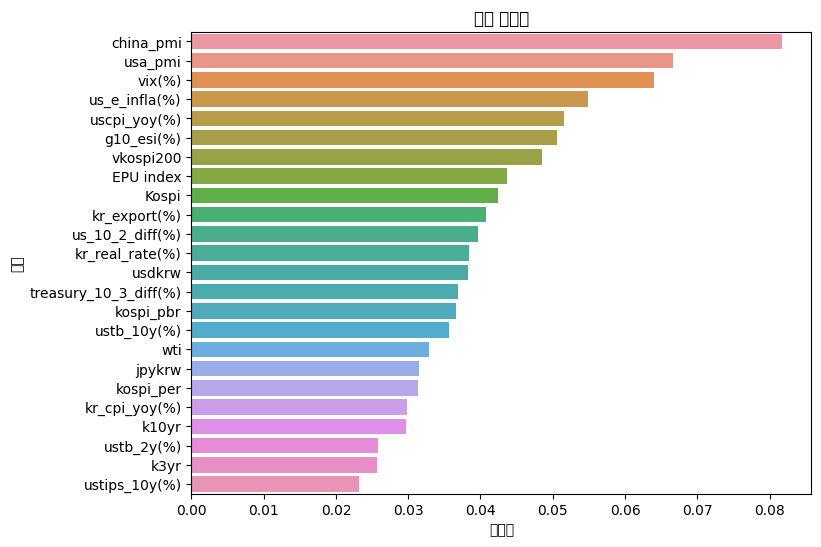

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
# plt.figure(figsize=(8,6))
# plt.title('Feature Importances Top 4')
# sns.barplot(x=rf_clf.feature_importances_, y=data.columns[:24])
# plt.show()

# Random Forest 모델을 학습한 후

# 피쳐 중요도 가져오기
importances = rf_clf.feature_importances_

# 피쳐 이름 가져오기 (필요한 피쳐만 선택)
feature_names = ['Kospi', 'usdkrw', 'jpykrw', 'k3yr', 'k10yr',
       'kospi_per', 'kospi_pbr', 'vkospi200', 'g10_esi(%)', 'wti',
       'ustb_2y(%)', 'ustb_10y(%)', 'ustips_10y(%)', 'vix(%)', 'EPU index',
       'usa_pmi', 'china_pmi', 'kr_export(%)', 'kr_cpi_yoy(%)', 'uscpi_yoy(%)',
       'treasury_10_3_diff(%)', 'us_10_2_diff(%)', 'us_e_infla(%)',
       'kr_real_rate(%)']  # 필요한 피쳐의 이름을 직접 지정해주세요.

# 피쳐 중요도를 데이터프레임으로 변환
df_importances = pd.DataFrame({'피쳐': feature_names, '중요도': importances})

# 중요도 순으로 데이터프레임 정렬
df_importances = df_importances.sort_values('중요도', ascending=False)

# 피쳐 중요도 시각화
plt.figure(figsize=(8, 6))
plt.title('피쳐 중요도')
sns.barplot(x='중요도', y='피쳐', data=df_importances)
plt.xlabel('중요도')
plt.ylabel('피쳐')
plt.show()


In [11]:
import matplotlib.pyplot as plt

# 원하는 칼럼들의 인덱스 추출
selected_columns = ['Kospi', 'usdkrw', 'jpykrw', 'k3yr', 'k10yr',
       'kospi_per', 'kospi_pbr', 'vkospi200', 'g10_esi(%)', 'wti',
       'ustb_2y(%)', 'ustb_10y(%)', 'ustips_10y(%)', 'vix(%)', 'EPU index',
       'usa_pmi', 'china_pmi', 'kr_export(%)', 'kr_cpi_yoy(%)', 'uscpi_yoy(%)',
       'treasury_10_3_diff(%)', 'us_10_2_diff(%)', 'us_e_infla(%)',
       'kr_real_rate(%)']  # 원하는 칼럼들의 이름 리스트

# 선택한 칼럼들의 피쳐 중요도와 이름 추출
selected_importances = importances[indices]
selected_features = np.array(selected_columns)

# 피쳐 중요도 정렬
sorted_indices = np.argsort(selected_importances)[::-1]
sorted_importances = selected_importances[sorted_indices]
sorted_features = selected_features[sorted_indices]

# 막대 그래프 생성
plt.figure(figsize=(10, 6))
plt.title('Feature Importances')

# 막대 그래프 그리기
plt.barh(range(len(sorted_features)), sorted_importances, align='center')
plt.yticks(range(len(sorted_features)), sorted_features)
plt.xlabel('Importance')
plt.ylabel('Features')

# 그래프 출력
plt.show()


NameError: name 'indices' is not defined

In [62]:
len(importances)

24

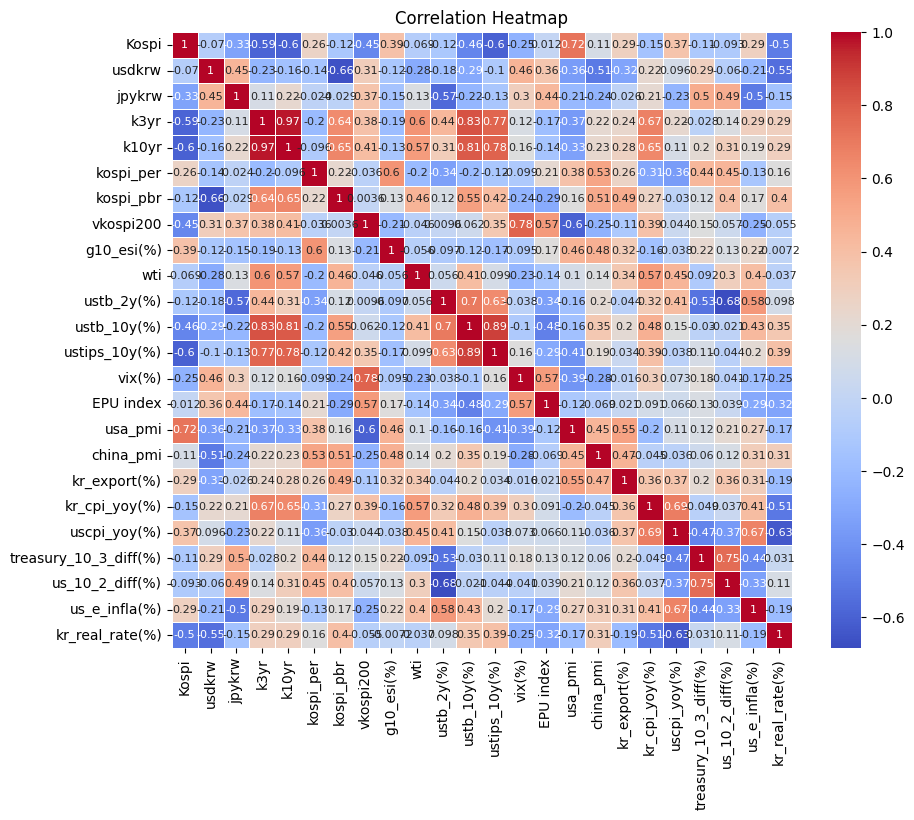

In [12]:
import matplotlib.pyplot as plt
selected_features = ['Kospi', 'usdkrw', 'jpykrw', 'k3yr', 'k10yr',
       'kospi_per', 'kospi_pbr', 'vkospi200', 'g10_esi(%)', 'wti',
       'ustb_2y(%)', 'ustb_10y(%)', 'ustips_10y(%)', 'vix(%)', 'EPU index',
       'usa_pmi', 'china_pmi', 'kr_export(%)', 'kr_cpi_yoy(%)', 'uscpi_yoy(%)',
       'treasury_10_3_diff(%)', 'us_10_2_diff(%)', 'us_e_infla(%)',
       'kr_real_rate(%)']

corr_matrix = data[selected_features].corr()

# 상관관계 행렬 출력

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, annot_kws={'size': 8})
plt.title('Correlation Heatmap')
plt.show()

In [16]:
len(X_train.columns)

24

In [25]:
X_train

,Kospi,usdkrw,jpykrw,k3yr,k10yr,kospi_per,kospi_pbr,vkospi200,g10_esi(%),wti,...,EPU index,usa_pmi,china_pmi,kr_export(%),kr_cpi_yoy(%),uscpi_yoy(%),treasury_10_3_diff(%),us_10_2_diff(%),us_e_infla(%),kr_real_rate(%)
0,1452.5500,942.836364,8.034273,4.795238,4.940476,11.62,1.48,19.947143,17.400000,60.56,...,54.724516,50.7,52.3,13.2,2.2,2.4,0.145238,-0.009091,2.79766,2.595238
1,1743.6000,928.128571,7.561238,5.224500,5.481500,14.90,1.61,20.586500,29.800000,67.48,...,50.801667,52.6,55.0,14.5,2.5,2.7,0.257000,0.128500,3.21462,2.724500
2,1946.4800,929.210000,8.068450,5.388824,5.522353,16.99,1.80,31.315882,5.000000,79.93,...,79.891333,51.0,55.0,-1.1,2.3,2.0,0.133529,0.510000,2.57405,3.088824
3,1897.1300,931.404762,8.260250,5.883684,5.831111,16.84,1.75,29.447222,6.633333,91.73,...,91.996129,49.0,53.3,14.8,3.6,4.3,-0.057778,0.980500,2.54378,2.283684
4,1703.9900,981.332500,9.738300,5.151905,5.367143,15.39,1.59,30.740952,-9.500000,105.56,...,121.869032,48.3,54.4,18.4,3.9,4.0,0.215238,1.893000,1.93368,1.251905
5,1674.9200,1031.642857,9.640619,5.668333,5.871500,13.31,1.40,23.795000,-20.925000,133.93,...,98.481000,49.8,53.3,16.4,5.5,4.2,0.192222,1.325714,2.72851,0.168333
6,1448.0601,1133.740909,10.628818,5.813333,5.974286,11.25,1.20,31.319048,-17.900000,103.90,...,183.974333,44.8,47.7,27.6,5.1,5.4,0.160952,1.610000,2.73093,0.713333
7,1124.4700,1358.969565,14.907609,4.058056,4.921579,8.99,0.94,56.310952,-98.250000,41.02,...,165.278710,33.1,41.2,-17.9,4.1,1.1,0.907812,1.595455,0.28300,-0.041944
8,1206.2600,1448.256818,14.813000,3.674091,4.965714,9.01,1.01,41.293636,-42.900000,47.98,...,189.934839,36.0,44.8,-22.5,3.9,0.2,1.298571,1.888182,-0.48068,-0.225909
9,1390.0699,1259.568182,13.027727,4.084762,5.245909,18.39,1.10,30.858636,51.625000,69.68,...,107.173667,45.8,51.8,-13.6,2.0,-1.3,1.161429,2.537727,1.27451,2.084762


In [24]:
X_scaledtrain

array([[-1.64949614, -1.85175086, -1.55039149, ..., -2.09283267,
         1.49907033,  1.87024458],
       [-0.63190697, -2.00751941, -1.77904381, ..., -1.9096313 ,
         2.09025543,  2.01210681],
       [ 0.07741613, -1.99606612, -1.5338711 , ..., -1.40166661,
         1.18202577,  2.41194447],
       ...,
       [ 1.40477439, -0.24802027, -0.64058455, ..., -1.57602883,
        -0.2117878 , -0.23304899],
       [ 1.46400189,  0.01657283, -0.61376999, ..., -1.7660753 ,
         0.9494423 , -1.08378983],
       [ 0.40802335,  0.04233516, -0.60499906, ..., -1.62031183,
         0.34127141, -0.36806302]])

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 각 변수별 다중공선성 다시 체크해보자
vif = pd.DataFrame()

# VIF 계산
vif["features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_scaledtrain, i) for i in range(X_scaledtrain.shape[1])]

print(vif)

                 features    VIF Factor
0                   Kospi  1.907463e+01
1                  usdkrw  2.525631e+01
2                  jpykrw  1.794912e+01
3                    k3yr           inf
4                   k10yr  1.796250e+05
5               kospi_per  1.566482e+01
6               kospi_pbr  1.255565e+01
7               vkospi200  1.399121e+01
8              g10_esi(%)  3.121779e+00
9                     wti  1.520129e+01
10             ustb_2y(%)  2.978628e+02
11            ustb_10y(%)  2.223991e+02
12          ustips_10y(%)  9.253607e+01
13                 vix(%)  6.982244e+00
14              EPU index  6.320518e+00
15                usa_pmi  2.331141e+01
16              china_pmi  1.275102e+01
17           kr_export(%)  1.307697e+01
18          kr_cpi_yoy(%)           inf
19           uscpi_yoy(%)  1.525348e+01
20  treasury_10_3_diff(%)  1.019191e+04
21        us_10_2_diff(%)  1.117291e+02
22          us_e_infla(%)  4.919793e+00
23        kr_real_rate(%)           inf


c:\Users\HangAri\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
